# **AIRBIN LISTING**

---







In [ ]:
# import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('airbin2.csv')

# display the first 5 rows
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
data.drop(['name','host_id','host_name','last_review'], axis=1, inplace=True)

In [ ]:
data.fillna({'reviews_per_month' : 0},inplace=True)

In [ ]:
data.isna().sum()

id                                0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## **REMOVING** **OUTLIERS**

In [ ]:

# Calculate the IQR for the 'price' column
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the 'price' column
data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

# **EDA**

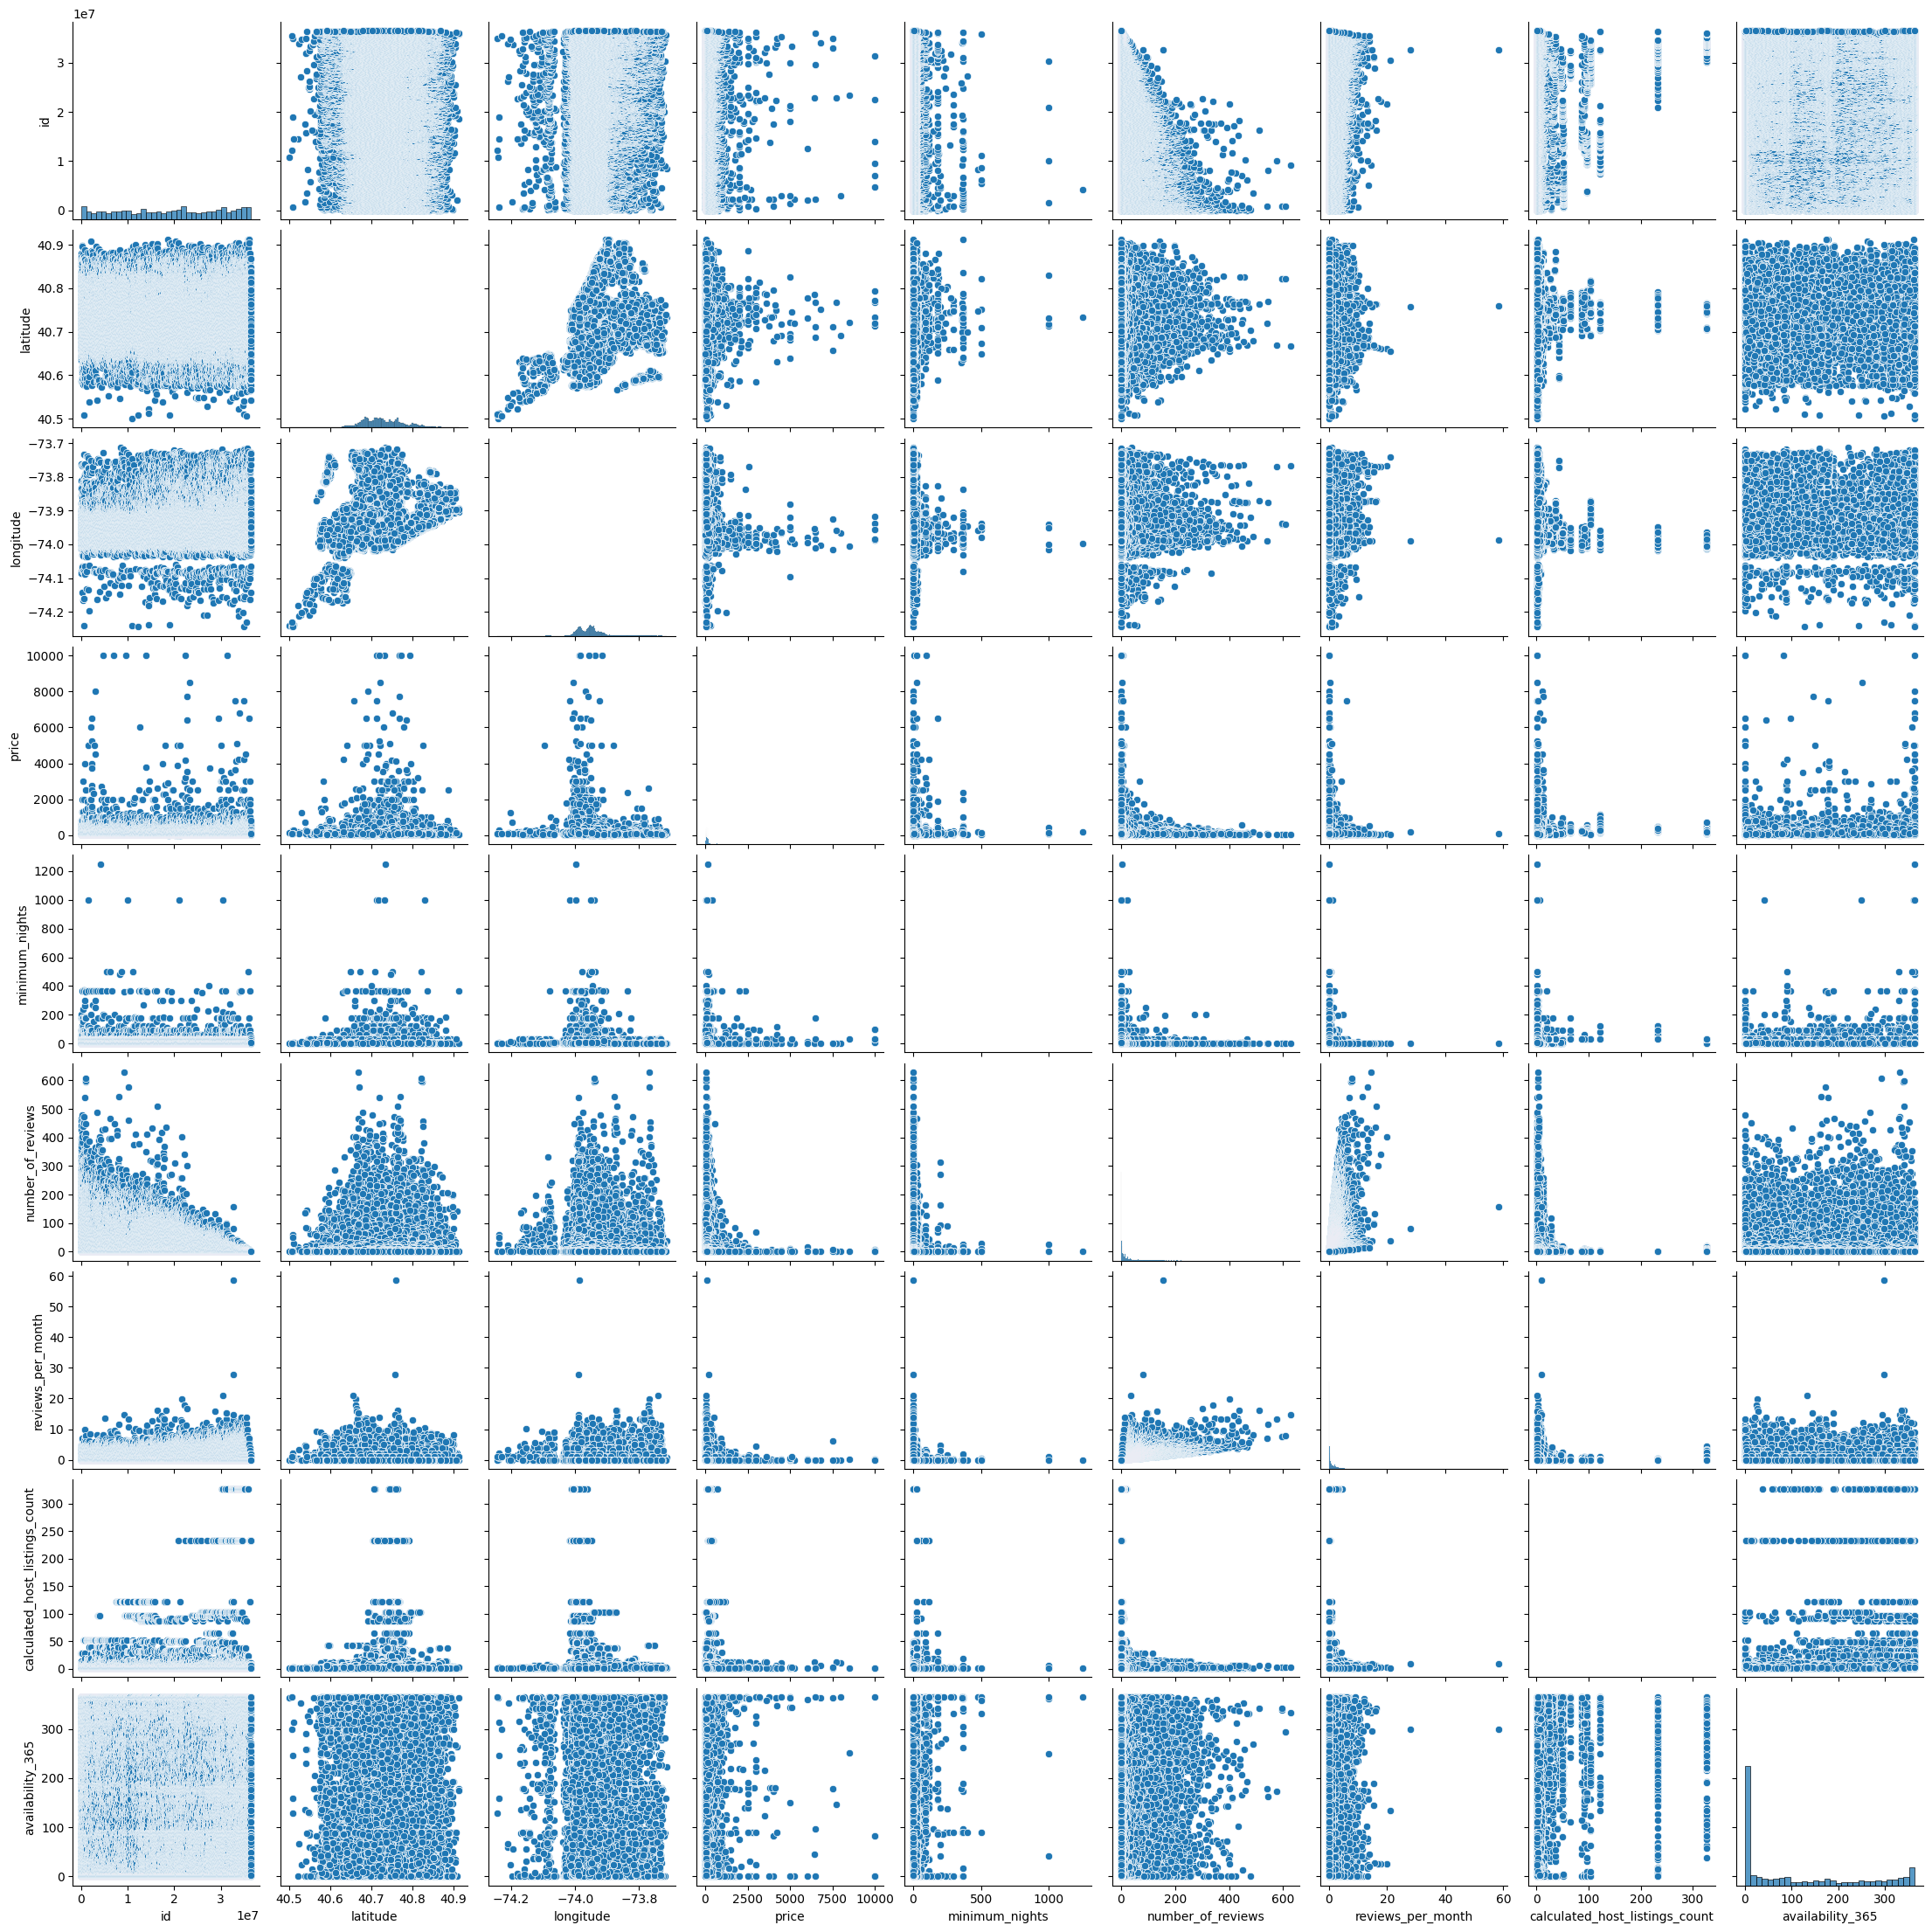

In [ ]:
ax = sns.pairplot(data)
plt.show()

In [ ]:
plt.figure(figsize=(20, 16))
plt.ylabel('Parameters')
#sns.histplot(x='price', y='id ', data=data,color='b',size='price')
sns.histplot(x='price', y='neighbourhood_group'[:10], data=data,color='r')
sns.histplot(x='price', y='neighbourhood', data=data,color='g')
sns.histplot(x='price', y='latitude', data=data,color='orange')
sns.histplot(x='price', y='longitude', data=data,color='black')
sns.histplot(x='price', y='room_type', data=data,color='brown')
#sns.histplot(x='price', y='minimum_nights ', data=data,color='indigo')
#sns.histplot(x='price', y='number_of_reviews ', data=data,color='b')
#sns.histplot(x='price', y='reviews_per_month ', data=data,color='yellow')
#sns.histplot(x='price', y='calculated_host_listings_count ', data=data,color='grey')
#sns.histplot(x='price', y='availability_365 ', data=data,color='magenta')
plt.xticks(rotation=90)
plt.show()

NameError: ignored

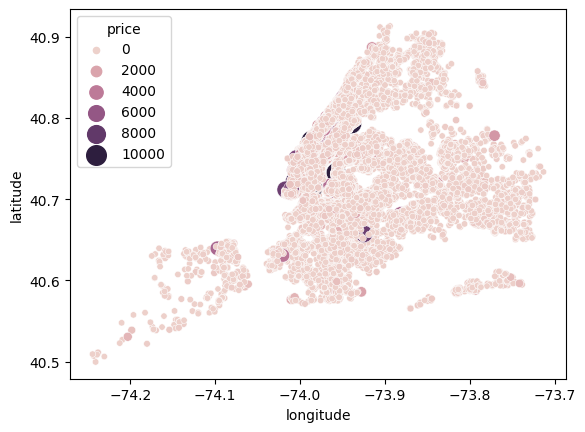

In [ ]:
sns.scatterplot(data=data, x='longitude', y='latitude', hue='price', size="price",
    sizes=(20, 200))
plt.show()

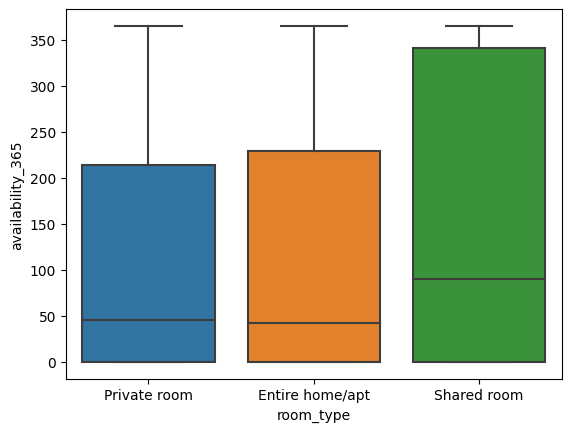

In [ ]:
sns.boxplot(data=data,x='room_type',y='availability_365')
plt.show()

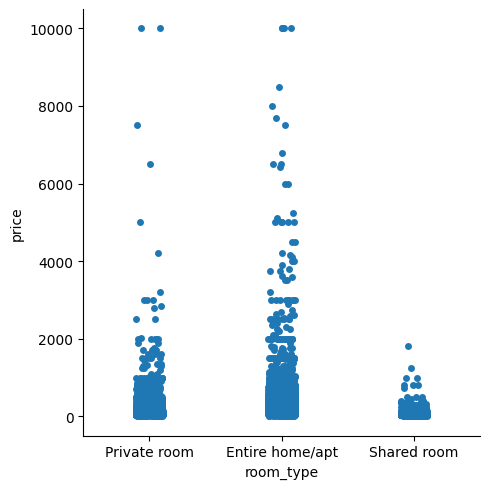

In [ ]:
sns.catplot(data=data,x='room_type',y='price')
plt.show()

<Axes: xlabel='room_type', ylabel='reviews_per_month'>

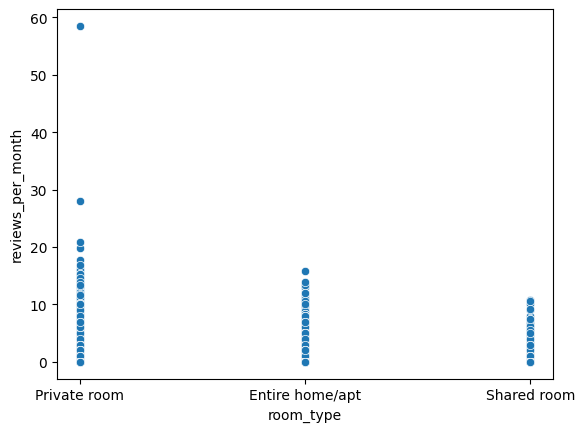

In [ ]:
sns.scatterplot(data=data,y='reviews_per_month',x='room_type')

<Axes: xlabel='neighbourhood_group', ylabel='price'>

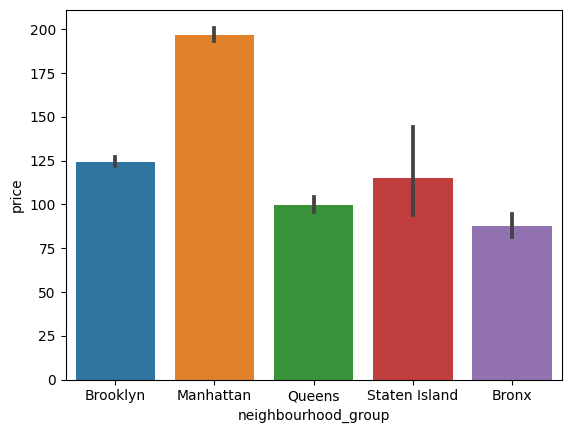

In [ ]:
sns.barplot(data=data,x='neighbourhood_group',y='price')

# **MODELING**

1.   KNN Algorithm
2.   Logistic Regression
3.   Linear Regression



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44670 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              44670 non-null  int64  
 1   neighbourhood_group             44670 non-null  int64  
 2   neighbourhood                   44670 non-null  int64  
 3   latitude                        44670 non-null  float64
 4   longitude                       44670 non-null  float64
 5   room_type                       44670 non-null  int64  
 6   price                           44670 non-null  int64  
 7   minimum_nights                  44670 non-null  int64  
 8   number_of_reviews               44670 non-null  int64  
 9   reviews_per_month               44670 non-null  float64
 10  calculated_host_listings_count  44670 non-null  int64  
 11  availability_365                44670 non-null  int64  
dtypes: float64(3), int64(9)
memory u

In [ ]:
# Example preprocessing for a dataset with categorical features
# Replace 'categorical_column' with the name of your categorical column
le = LabelEncoder()
data['neighbourhood_group'] = le.fit_transform(data['neighbourhood_group'])
data['room_type'] = le.fit_transform(data['room_type'])
data['neighbourhood'] = le.fit_transform(data['neighbourhood'])
# Handle missing values (if any)
# airbnb_data = airbnb_data.fillna(0)  # Replace NaN values with 0 or any other suitable strategy

# Split the data into features (X) and target variable (y)
X = data.drop('price', axis=1)  # Remove the 'price' column as the target
y = data['price']

# Standardize numerical features
#scaler = StandardScaler()
#X[['neighbourhood_group','neighbour','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month',' calculated_host_listings_count','availability_365 ']] = scaler.fit_transform(X[['neighbourhood_group','neighbour','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month',' calculated_host_listings_count','availability_365 ']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44670 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              44670 non-null  int64  
 1   neighbourhood_group             44670 non-null  int64  
 2   neighbourhood                   44670 non-null  int64  
 3   latitude                        44670 non-null  float64
 4   longitude                       44670 non-null  float64
 5   room_type                       44670 non-null  int64  
 6   price                           44670 non-null  int64  
 7   minimum_nights                  44670 non-null  int64  
 8   number_of_reviews               44670 non-null  int64  
 9   reviews_per_month               44670 non-null  float64
 10  calculated_host_listings_count  44670 non-null  int64  
 11  availability_365                44670 non-null  int64  
dtypes: float64(3), int64(9)
memory u

In [ ]:


# Train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_classifier.predict(X_test)
print(y_pred)


[35 73 25 ... 65 35 45]


In [ ]:
X = data[['neighbourhood_group','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month',]]
y = data['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[ 60 150  65 ...  60 150  65]


In [ ]:
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.06950973807924782


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
print(y_pred.astype(int))

[ 75 164  54 ...  73 159 167]


In [ ]:
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.44645594536246325
